# Assignment 2 - Clustering
```
James Ambat
Assignment 2
CS-663
```

## My Setup
From the terminal, create and activate the virtual environment:
```
cd kmeans-jaambat
mkdir venv
python3 -m venv ./venv
source venv/bin/activate
```

I used PyCharm IDE for development and linked the interpreter with the following steps:
```
PyCharm -> Settings -> Project: kmeans-jaambat
Python Interpretter -> Add Interpretter
Add Local Interpretter -> /kmeans-jaambat/venv
```

From the terminal, install the required libraries:
```
cd kmeans-jaambat
pip install -r requirements.txt
```

# Part 1 - Implement K-Means
Create a python-based implementation of the K-Means algorithm.
* See my implementation of KMeans in `KMeans.py` and `Part 1 Calculations`
* I test my implementation to verify performance in `Part 1 Calculations`.
  * The test uses (4) 2-dimensional points and k centroids that are randomly initialized
  * Distances to centroids are iteratively calculated for a `max_iterations` number of times.
  * The points are plotted using `plot_clustered_instances()` method to visualize the clustering.

## Part 1 Calculations

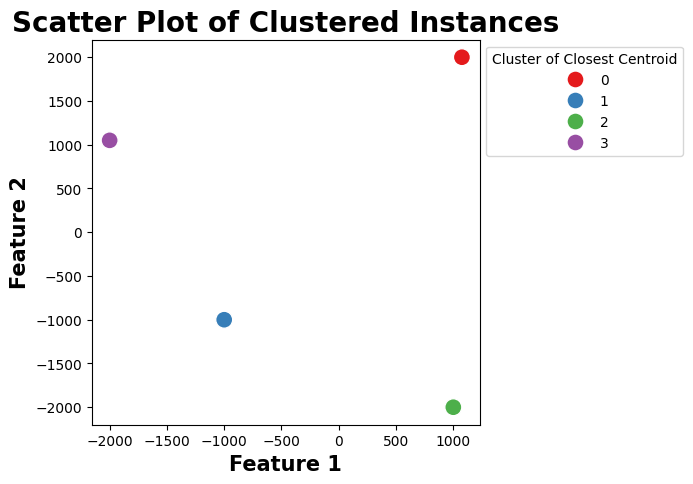

In [3]:
# Part 1 - Implement K means
from KMeans import KMeans
k_means = KMeans(k=4, max_iterations=100)

# A list of test instances in 2-Dimensions
x_test = [[-1000, -1000], [-2000, 1050], [1000, -2000], [1075, 2000]]

# Test the implementations and plot the results.
closest_centroids, centroid_coordinates = k_means.fit(x=x_test)
k_means.plot_clustered_instances(instances=x_test, closest_centroids=closest_centroids, scatter_plot_dot_size=150)